# Assignment 2 - Predictive Process Monitoring

*Due: Friday, 15 December, 2023 at 14:00 CET*

In this assignment, you will learn to use several regression models to predict the process remaining time. In addition, you will also show that you can evaluate their performance and discuss the results in a report. The learning objectives of this assignment are: 

- use the data aggregation, feature encoding, and data transformation techniques to preprocess event data
- use the regression models to predict the remaining time of ongoing cases. 
- perform cross validation and fine-tune the model parameters of each algorithm
- calculate model performance (e.g., MAE, MSE, RMSE, R^2, etc.)
- design experiments to compare the performance of algorithms
- reflect on the difference between different models


This assignment includes two algorithms: Regression Tree (or Random Forest Regression) and kNN regressor. Following a similar structure as the first assignment, your first task is to perform data exploration and data cleaning. 
In Task 2, you will perform two trace encoding techniques (covered during Lecture 07). 
In Task 3-4, you will use the two algorithms to learn regression models to forecast the remaining time of each case after each event. 
In Task 5, you will compare the algorithms and evaluate their results. 

Please note that Task 3 and 4 have the following structure:
1. First, find the library (e.g., sklearn examples) and try out the algorithm by simply training the model on the training data (do not consider any parameters or cross validation just yet); 
2. Train the model with the training data by using cross validation and find the best parameter setting for the parameters of interest;
3. Report the average MAE, MSE, RMSE, and R^2 of all validation sets;
4. Finally, test the optimal model that has the best fitting parameters on your held-out test data, and report its MAE, MSE, RMSE, and R^2. 

Note that, in Task 5, you will need all the calculated MAE, MSE, RMSE, and R^2 on both encoded data from previous tasks. Make sure you save these to a list or dictionary so you can easily evaluate and compare the results. 



## Task 1: Exploring the data set



### Data set: Sepsis

Import the file *sepsis.csv* to load the Sepsis data set. This real-life event log contains events of sepsis cases from a hospital. Sepsis is a life threatening condition typically caused by an infection. One case represents a patient's pathway through the treatment process. The events were recorded by the ERP (Enterprise Resource Planning) system of the hospital. The original data set contains about 1000 cases with in total 15,000 events that were recorded for 16 different activities. Moreover, 39 data attributes are recorded, e.g., the group responsible for the activity, the results of tests and information from checklists. 

Additional information about the data can be found :
- https://data.4tu.nl/articles/dataset/Sepsis_Cases_-_Event_Log/12707639
- http://ceur-ws.org/Vol-1859/bpmds-08-paper.pdf




In [17]:
# Import packages
import pandas as pd

# Import data
# TODO: Change the file path to your file path
data = pd.read_csv("./sepsis.csv", sep=";")

# create an overview of the data
# print(data_Sepsis.describe())
print(data.columns)
print(data.head())
print(data['Activity'].unique())

Index(['DiagnosticArtAstrup', 'DiagnosticBlood', 'DiagnosticECG',
       'DiagnosticIC', 'DiagnosticLacticAcid', 'DiagnosticLiquor',
       'DiagnosticOther', 'DiagnosticSputum', 'DiagnosticUrinaryCulture',
       'DiagnosticUrinarySediment', 'DiagnosticXthorax', 'DisfuncOrg',
       'Hypotensie', 'Hypoxie', 'InfectionSuspected', 'Infusion', 'Oligurie',
       'SIRSCritHeartRate', 'SIRSCritLeucos', 'SIRSCritTachypnea',
       'SIRSCritTemperature', 'SIRSCriteria2OrMore', 'Age', 'Case ID',
       'Activity', 'Diagnose', 'org:group', 'CRP', 'LacticAcid', 'Leucocytes',
       'Complete Timestamp', 'duration', 'month', 'weekday', 'hour', 'remtime',
       'elapsed'],
      dtype='object')
  DiagnosticArtAstrup DiagnosticBlood DiagnosticECG DiagnosticIC  \
0                True            True          True         True   
1                True            True          True         True   
2                True            True          True         True   
3                True            T


### 1.1 Exploratory data analysis

For the data set, create 2-3 figures and tables that help you understand the data 

**Use the column "remtime" (which indicates the remaining time of each case after each corresponding event) as the response variable for regression**

Note that some of these variables are categorical variables. How would you preprocess these variables?


#### Tips: ---------------

During the data exploration, you, as a team, are trying to get an impression of the data. You will create figures and/or tables that help you to get to know the data. While exploring the data, you may also consider answering the following questions, which may help you understand the data better. For example, 

- How many variables are in the data? What are the data type and the distribution of each variable? 
- What is the discribution of the response variable?
- Are the variables informative?
- Are any pair of the potential predictor variables highly correlated?
- (Should the variables be normalized or not?)
- (Any relevant, useful preprocessing steps that may be taken?)



Make sure to at least check the data type of each variable and to understand the distribution of each variable, especially the response variable. 

Try to find out what factors seem to determine whether an instance is an outlier or not. What do you conclude?

*For creating data visualizations, you may consider using the matplot library and visit the [matplot gallery](https://matplotlib.org/stable/gallery/index.html) for inspiration (e.g., histograms for distribution, or heatmaps for feature correlation).*

In [21]:
# Generating a summary table for numerical variables
numerical_summary = data.describe()

# Displaying the summary table
numerical_summary.transpose()


,count,mean,std,min,25%,50%,75%,max
Age,5176.0,70.191267,17.418468,0.0,60.0,75.000000,85.000000,90.000000
CRP,5176.0,33.845634,74.729799,0.0,0.0,0.000000,20.000000,573.000000
LacticAcid,5176.0,0.547276,1.187220,0.0,0.0,0.000000,0.700000,11.000000
Leucocytes,5176.0,4.700155,10.590811,0.0,0.0,0.000000,8.800000,296.200000
duration,5176.0,8.265385,35.952867,0.0,0.0,0.266667,7.366667,782.466667
month,5176.0,6.531685,3.568158,1.0,3.0,6.000000,10.000000,12.000000
weekday,5176.0,2.930835,2.018046,0.0,1.0,3.000000,5.000000,6.000000
hour,5176.0,11.244397,8.203143,0.0,3.0,9.000000,19.000000,23.000000
remtime,5176.0,1193.775889,3469.657735,0.0,0.0,236.500000,1173.500000,47793.000000
elapsed,5176.0,1574.430835,4087.046260,0.0,155.0,759.000000,1553.000000,47793.000000


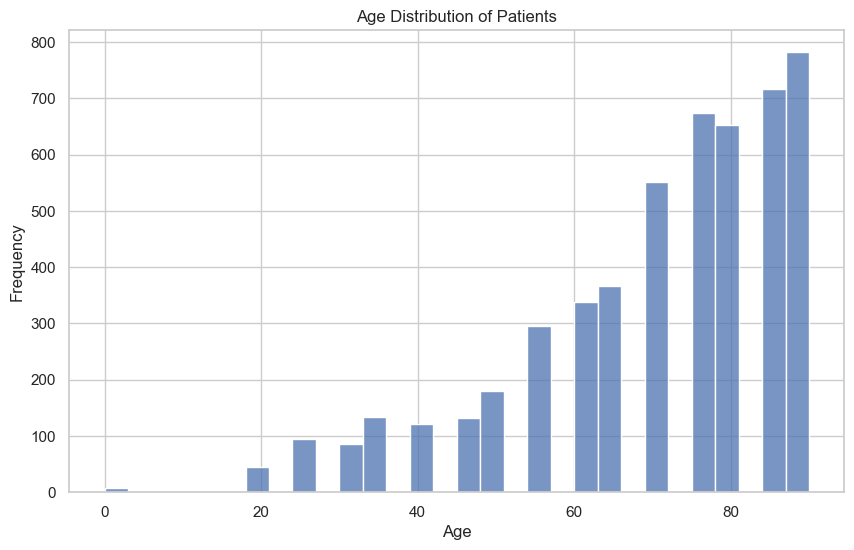

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Plotting the histogram for the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=False)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


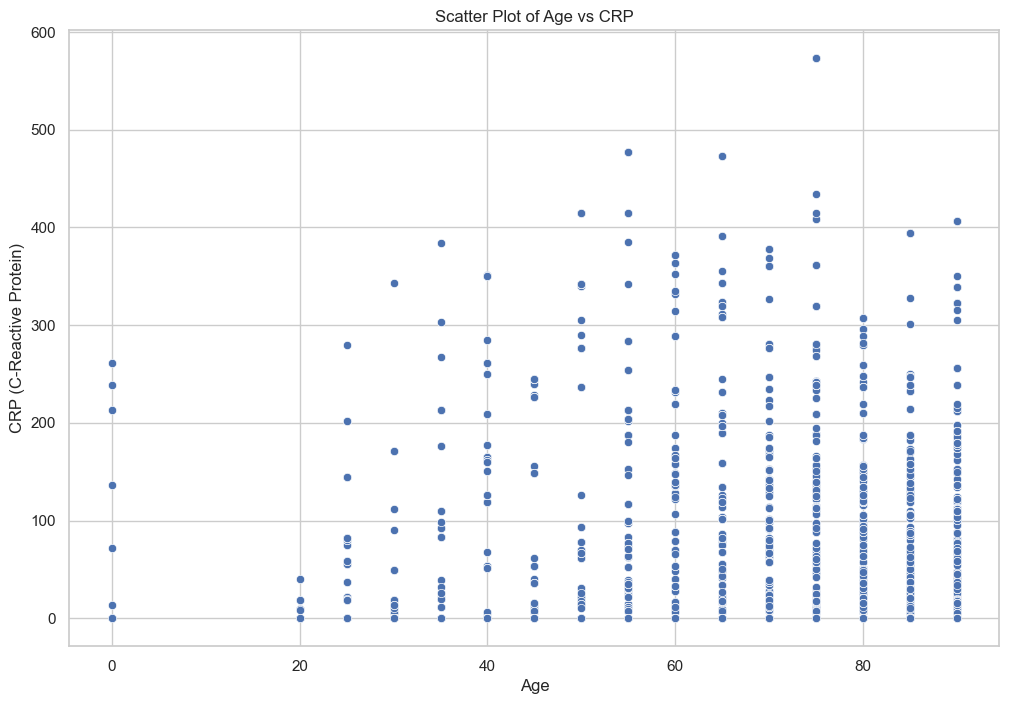

In [23]:
# Creating a scatter plot for Age vs CRP
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Age'], y=data['CRP'])
plt.title('Scatter Plot of Age vs CRP')
plt.xlabel('Age')
plt.ylabel('CRP (C-Reactive Protein)')
plt.show()


In [24]:
TIMESTAMP_FEATURES = ["Complete Timestamp", "month", "weekday", "hour"]
DURATION_FEATURES = ["remtime", "elapsed", "duration"]
IDENTIFIER_FEATURES = ["Case ID", "org:group"]
CATEGORICAL_FEATURES = ["Activity", "Diagnose"]
BOOLEAN_FEATURES = [
    "DiagnosticArtAstrup",
    "DiagnosticBlood",
    "DiagnosticECG",
    "DiagnosticIC",
    "DiagnosticLacticAcid",
    "DiagnosticLiquor",
    "DiagnosticOther",
    "DiagnosticSputum",
    "DiagnosticUrinaryCulture",
    "DiagnosticUrinarySediment",
    "DiagnosticXthorax",
    "DisfuncOrg",
    "Hypotensie",
    "Hypoxie",
    "InfectionSuspected",
    "Infusion",
    "Oligurie",
    "SIRSCritHeartRate",
    "SIRSCritLeucos",
    "SIRSCritTachypnea",
    "SIRSCritTemperature",
    "SIRSCriteria2OrMore",
]
NUMERICAL_FEATURES = [
    "Age",
    "CRP",
    "LacticAcid",
    "Leucocytes",
]

### 1.2 Data cleaning

You have now gathered some information about the data during the data exploration task. You also know from the assignment description that you will be using regression trees and kNN regression models to predict the remaining time.

Based on the above information, decide on which cleaning steps you will need to perform and implement them accordingly.


In [25]:
# TODO: fill in the empty cells if necessary
# TODO: perform data transformation steps if necessary

missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)



Series([], dtype: int64)


In [26]:
boolean_columns = data.select_dtypes(include=['bool']).columns

for column in boolean_columns:
    data[column].fillna(data[column].mean(), inplace=True)

In [27]:
for column in BOOLEAN_FEATURES:
    data[column] = data[column].apply(lambda x: 1 if x == 'True' else 0)


### 1.3 Process Discovery and Visualization (Optional)

This is an optional task to show you how process discovery and visualizaion can be deployed using the pm4py library. 

(*The following code requires the graphviz library to be installed. If you have issues with installing the graphviz, you may try to follow the instructions on Install GraphViz on the [pm4py](https://pm4py.fit.fraunhofer.de/install-page) install page*)

The following code:
- fill in the columns for case id, activity, and timestamps
- convert the data set into an event log
- discover a Directly-follows graph (DFG) and a process model for each event log. 
- you may use the discovered process model in your report



In [28]:
# Install pm4py library and graphviz library using pip install
#!pip install -U pm4py
#!pip install graphviz
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="pm4py")

import pm4py

# Fill in the column names of case id, activity, and time stamps
column_Sepsis_CaseID = "Case ID"
column_Sepsis_Activity = "Activity"
column_Sepsis_Timestamps = "Complete Timestamp"

data[column_Sepsis_CaseID] = data[column_Sepsis_CaseID].astype(str)


# Convert the data to an event log
log_Sepsis = pm4py.format_dataframe(
    data.copy(),
    case_id=column_Sepsis_CaseID,
    activity_key=column_Sepsis_Activity,
    timestamp_key=column_Sepsis_Timestamps,
)

# Set the log to be the one that you are interested
log = log_Sepsis

# Create a Directly-Follows Graph (DFG) and plot this graph
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

# Discover a Process Model using Inductive Miner and plot this BPMN model
# process_tree = pm4py.discover_tree_inductive(log)
process_tree = pm4py.discover_process_tree_inductive(log)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Task 2: Preprocessing and Trace Encoding


### 2.1 Trace Encoding


- Implement the last-2-state encoding for the data set 
- Implement the aggregated encoding for the data set (for example, see [1], Table 6)


<span style="color:gray">[1] Ilya Verenich, Marlon Dumas, Marcello La Rosa, Fabrizio Maria Maggi, Irene Teinemaa:
Survey and Cross-benchmark Comparison of Remaining Time Prediction Methods in Business Process Monitoring. ACM Trans. Intell. Syst. Technol. 10(4): 34:1-34:34 (2019) [Section 1, 2, 4.1, 4.3, 4.6, 5.2, 5.3, 5.4, and 6] </span>

These two encodings are discussed during lecture 7.
In case you find difficult to implement the algorithms, you may also consider use the pandas functions to help you:
- for the last-2-state encoding, check the pandas groupby.DataFrameGroupBy.shift and see the [answer on the stake overflow](https://stackoverflow.com/questions/53335567/use-pandas-shift-within-a-group)
- for the aggregated encoding check the pandas groupby.DataFrameGroupBy and cumsum function and read the [examples and answers on the stake overflow](https://stackoverflow.com/a/49578219)

In [29]:

# TODO: Implement the function that returns the last-state encoding of a log
def last_2_state_encoding(_data, columnCase, columnActivity):
    _data['last_activity'] = _data.groupby(columnCase)[columnActivity].shift(1)
    _data['second_last_activity'] = _data.groupby(columnCase)[columnActivity].shift(2)
    return _data


# TODO: Implement the function that returns the aggregated state encoding of a log
def agg_state_encoding(_data, columnCase, columnActivity):
    for activity in _data[columnActivity].unique():
        _data[activity] = (_data[columnActivity] == activity).astype(int)

    # Calculating cumulative sum for each activity grouped by case
    activities = list(_data[columnActivity].unique())
    _data[activities] = _data.groupby(columnCase)[activities].cumsum()
    return _data


# TODO: for each of the two data sets, create a last_2_state encoding and an aggregated state encoding
column_Sepsis_CaseID = 'Case ID' 
column_Sepsis_Activity = 'Activity'
data_Sepsis_ls = last_2_state_encoding(data.copy(), column_Sepsis_CaseID, column_Sepsis_Activity)

# Apply Aggregated Encoding
data_Sepsis_ag = agg_state_encoding(data.copy(), column_Sepsis_CaseID, column_Sepsis_Activity)


### 2.2 Create Training and Held-out test data sets


Create a training and a held-out test data set. *Later in Task 3-4, the training data will be used to perform cross-validation. The held-out test data will be used to evaluate the performance of the selected models.*

Choose the size of your test data. Furthermore, how did you split the data? Motivate your choice when you discuss the experiment setup in your report. 



Tips: *You may consider reuse some of your code from Assignment 1 Task 1.2*

In [ ]:
# TODO: create training data and held-out test data for *data_Sepsis_ls*



# TODO: create training data and held-out test data for *data_Sepsis_ag*



## Task 3: Predicting Case Remaining Time - Regression Trees


In this task, you will use the regression tree (or random forest regression if you prefer) to learn a regression model to predict case remaining time. Very similar to how you have trained a classification model in Assignment 1, now perform the following steps to train a regression model. 

i) use the default values for the parameters to get a [Regression Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) (or a [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) running on the training data. (*Optional: visualize the tree, the feature importance, and compute the error measures to get an impression of the performance of the model*).

ii) use 5-fold cross-validation to determine a possibly better choice for the two parameters *min_samples_leaf* and *max_depth*
    
iii) create 2D or 3D plot that shows how the selected parameters affect the performance. 

iv) select the best-performing regression tree (or forest), i.e., the one that achieved the lowest cross-validated errors, and report all the error measures (MAE, MSE, RMSE, R^2) of the fitted model on the held-out test data. 

    
#### TIPS:
You may consider reuse the some of your code of Assignment 1 or use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class (see an [example](https://www.dezyre.com/recipes/find-optimal-parameters-using-gridsearchcv-for-regression), but be aware that GridSearchSV does not return MAE or the other error measures (e.g., MSE, RMSE, R^2), you will need to update the scoring function)



In [ ]:
# TODO: import packages
from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor

# TODO: using *data_Sepsis_ls* and test the default regression tree model (or the random forest regressor) 

# TODO: set the search space of the parameters *min_samples_leaf* and *max_depth*

# TODO: create 5-fold cross-validation

# TODO: learn an optimal regression tree model (random forest regressor)

# TODO: create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE). 

# TODO: compute the performance of the model on your held-out test data


In [ ]:
# TODO: repeat the above steps for *data_Sepsis_ag*



## Task 4. Predicting Case Remaining Time - kNN Regression


In this task, you will use the kNN Regression to learn a regression model to predict case remaining time. The same as task 3, now perform the following steps to train a regression model. 

i) use the default values for the parameters to get a [kNN Regression](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) running on the training data. (*Optional: compute the error measures to get an impression of the performance of the model).

ii) use 5-fold cross-validation to determine a possibly better choice for the two parameters *n_neighbors* and *weights* 
    
iii) create 2D or 3D plot that shows how the selected parameters affect the performance. 

iv) select the best-performing kNN, i.e., the one that achieved the lowest cross-validated errors, and report all the error measures (MAE, MSE, RMSE, R^2) of the fitted model on the held-out test data. 

    
#### TIPS:
The same here, you may consider reuse the some of your code of Assignment 1 or use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class (see an [example](https://www.dezyre.com/recipes/find-optimal-parameters-using-gridsearchcv-for-regression), but be aware that GridSearchSV does not return MAE or the other error measures (e.g., MSE, RMSE, R^2), you will need to update the scoring function)







In [ ]:
# TODO: import packages
from sklearn.neighbors import KNeighborsRegressor


# TODO: using *data_Sepsis_ls* and test the default kNN Regressor model 

# TODO: set the search space of the parameters *n_neighbors* and *weights* 

# TODO: create 5-fold cross-validation

# TODO: learn an optimal kNN regressor

# TODO: create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE). 

# TODO: compute the performance of the model on your held-out test data

In [ ]:
# TODO: repeat the above steps for *data_Sepsis_ag*


## Task 5.  Report your results and discuss your findings

By now, you have applied two algorithms with different parameters on the two encodings of the data set. For each algorithm and each encoding, you have created tables or figures which you can add to your report. Discuss the results and their optimal performance. 

Create an overview table or figure that shows the optimal performance of each algorithm on the data set, for example, see the table here below. 


Discuss your findings and reflect on the following questions in your report:
- According to the error measures, which one would you suggest as the optimal model? 
- Are there any discrepancies between the MAE, MSE, RMSE, and R^2 measures in terms of which model performs the best? If yes, how would you explain these discrepancies. 
- Which one of the MAE, MSE, RMSE, and R^2 would you use for selecting the model? Why?
- Which one of the encoding would you suggest for this data set? Why?
- Which features have a big influence on predicting the remaining time?







| Encoding | Model | CV MAE  | Test MAE |  CV MSE  |  Test MSE  | CV R^2 | Test R^2 |... |
|------|------|------|------|------|------|------|------|-----|
|  Last-2-state | Regression Tree        |  |  | | | | |
|  Agg-state |  Regression Tree  |  |  | || | |
|   Last-2-state |kNN       |  |  | || | |
|   ... |...       |  |  | || | |











## Bonus Tasks 

We would like to challenge you with the following bonus tasks. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Implement or use another regression algorithm (for example, [Random Forest Regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), [LinearRegresion](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [SVM Regression](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)) or design your own algorithm that achieves a better MAE measure. Explain this in your report.
2. Implement techniques (e.g., preprocessing, feature engineering, feature selection, sampling) that help improve the MAE scores of existing models. For example, try out a feature selection for kNN or implement inter-case features. Explain this in your report.

